# Bekerley database
Bekerley database est une database NoSQL embarquée créée pour donner des performances élevées.
Elle n'a donc pas la possibilté de faire des requêtes SQL.

# Structure de Bekerley DB 
Elle repose sur deux principes:

Le premier consiste à faire des paires entre une clé et une valeur c'est-à-dire que chaque clé s'associera à une valeur.
Pourquoi utiliser des paires clé-valeur ?
Ce fonctionnement permet d'optimiser la vitesse d'execution pour une recherche, insertion, ou un mise à jour des données.

Le second principe repose sur l'absence de serveur, Bekerley database n'a pas un serveur de base de données centralisé.
Ce qui rend simple l'intégration dans des applications ou des systèmes emnbarqués.


# Fonctionnement de Bekerley database

Au niveau du stockage des données, les fichiers seront stockés sur le disque de l'ordinateur, Bekerley DB a pour mission d'organiser et de gérer l'indexation des fichiers pour accéder rapidement aux données.

Plusieurs type d'accès sont définis:

1. le hash: Bekerley DB utilise une structure de hachage pour faciliter l'accès direct aux données.

2. Une queue : elle gère le cas des listes ordonnées pour FIFO par exemple

3. B-tree: le but est d'utiliser des arbres qui seront bien équilibrés pour rechercher et organiser efficacement les données

4. Recno: la database va faire des enregistrements numérotés de manière séquentielle

De nombreuses fonctionnalités sont disponibles pour rendre la database facile à utiliser,efficace et fiable:

La cohérence des données est mis en avant grâce aux transactions ACID c'est-à-dire:

A pour atomicité, les opérations sont soient toutes exécutées, soient aucune n'est réalisé.

C pour cohérence, les données sont constamment dans un état valide.

I pour isolation, les transactions ne vont pas interférer entre elles.

D pour durabilité, les données sont sauvegardées même dans des cas de pannes.

# Pourquoi utiliser Bekerley DB ? 

La database s'avère utile pour les systèmes embarqués puisqu'il faut dans ce cas d'usage un stockage léger et rapide comme ce que propose Bekerley DB.
Elle peut également être utiliser dans des systèmes de messagerie afin de gérer les files d'attentes et les transactions.
Ou encore dans des annuaires d'authentifications pour stocker les informations des utilisateurs.

# Où trouver la bekerley DB ?

Une bibliothèque est disponibble pour un ensemble de langauges informatiques comme Python, C/C++, et Java, ce qui rend la database exploitable par les développeurs. 

# Avantages/Inconvénients

Avantages:

- Open source, tout le monde a la possibilté de l'utiliser.

- Une structure de données optimisé qui permet un accès rapide aux données.

- Aucun serveur externe n'est nécessaire, pratique pour les systèmes embarquées.

Inconvénients:

- Manque de fonctionnalités comme les jointures pour faire des requêtes complexes à la DB 

- Système NoSQL, il faut donc avoir des compétences en tant que développeur pour utiliser la database.


# Structure de notre jeux de données pour effectuer la comparaison
Le jeu de données est composé de plusieurs attributs:
- Statut de l’établissement de la filière de formation (public, privé…)
- Établissement
- Région de l’établissement
- Filière de formation
- Part des terminales générales qui étaient en position de recevoir une proposition en phase principale
- region

Il a été trouvé sur le site de https://data.enseignementsup-recherche.gouv.fr/explore/dataset/fr-esr-parcoursup/table/

# Base de données MYSQL 
 La comparaison va se faire avec la base de données MYSQL qui est simple d'utilisation.
 

Il ne faut pas oublier de mettre son propre mot de passe d'utilisateur

In [ ]:
! pip install berkeleydb

In [7]:
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 2.4 MB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 KB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 2.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.1 MB/s eta 0:00:0000:0100:01


# CRUD pour bekerley database

# Création et insertion des données 

Bekerley database offre la possibilité de structurer sa base de données via différentes façon de faire qui présente certains avantages.
- La table de hachage 
- L'arbre Btree

 ## Implémentation de la db avec une table de hachage

Offre des performances très élevées pour les accès directs par clé, en particulier pour des bases de données de grande taille.
Moins efficace pour des requêtes qui impliquent des parcours ou des tris.

In [2]:
import berkeleydb
import csv
import time

def import_data_with_hash(csv_file,db_hash_file):
    db_hash = berkeleydb.db.DB()

    try:
        # Ouvrir la base de données avec hachage en mode création
        db_hash.open(db_hash_file, None, berkeleydb.db.DB_HASH, berkeleydb.db.DB_CREATE)

        # Démarrer le chronomètre pour mesurer le temps d'importation
        start_time = time.time()

        with open(csv_file, mode='r', encoding='utf-8') as f:
            reader = csv.reader(f, delimiter=',')
            headers = next(reader)  # Lire la première ligne comme en-têtes

            for i, row in enumerate(reader):
                key = f"ligne_{i}".encode()
                row_dict = dict(zip(headers, row))
                value = str(row_dict).encode()

                db_hash[key] = value

        # Arrêter le chronomètre
        end_time = time.time()
        return end_time - start_time  # Retourner la durée d'exécution

    except Exception as e:
        print(f"Une erreur est survenue avec DB_HASH : {e}")
    finally:
        db_hash.close()


## Implémentation de la db avec un arbre Btree 

Offre une bonne performance pour des recherches et insertions dans des bases de données structurées et ordonnées.
Les performances sont meilleures pour les requêtes impliquant des tris ou des recherches dans des plages de valeurs.
Cette méthode est plus adaptée pour regarder les performances sans index

In [3]:
import berkeleydb
import csv
import time

def import_data_with_btree(csv_file, db_btree_file):
    db_btree = berkeleydb.db.DB()

    try:
        # Ouvrir la base de données avec DB_BTREE en mode création
        db_btree.open(db_btree_file, None, berkeleydb.db.DB_BTREE, berkeleydb.db.DB_CREATE)

        # Démarrer le chronomètre pour mesurer le temps d'importation
        start_time = time.time()

        with open(csv_file, mode='r', encoding='utf-8') as f:
            reader = csv.reader(f, delimiter=',')
            headers = next(reader)  # Lire la première ligne comme en-têtes

            for i, row in enumerate(reader):
                key = f"ligne_{i}".encode()
                row_dict = dict(zip(headers, row))
                value = str(row_dict).encode()

                db_btree[key] = value

        # Arrêter le chronomètre
        end_time = time.time()
        return end_time - start_time  # Retourner la durée d'exécution

    except Exception as e:
        print(f"Une erreur est survenue avec DB_BTREE : {e}")
    finally:
        db_btree.close()


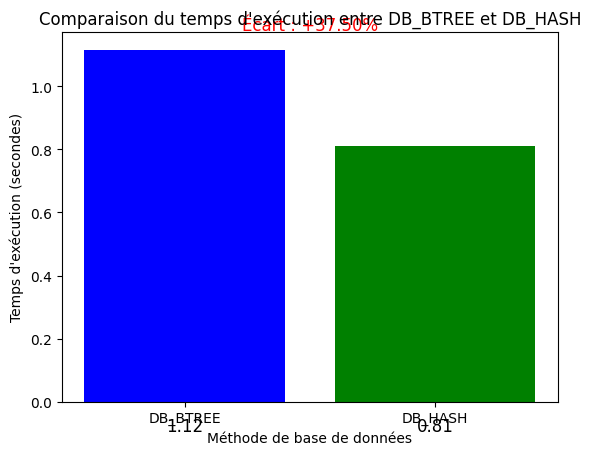

In [4]:
import matplotlib.pyplot as plt

# Chemin vers le fichier CSV et la base de données BerkeleyDB
csv_file = 'fr-esr-parcoursup_cleaned.csv'  # Remplace ce chemin si nécessaire
db_btree_file = 'parcoursup_btree.db'
db_hash_file = 'parcoursup_hash.db'

# Mesurer le temps d'exécution des deux approches
btree_duration = import_data_with_btree(csv_file, db_btree_file)
hash_duration = import_data_with_hash(csv_file, db_hash_file)

# Calculer l'écart en pourcentage
if btree_duration > hash_duration:
    percentage_diff = ((btree_duration - hash_duration) / hash_duration) * 100
    text = f'+{percentage_diff:.2f}%'
else:
    percentage_diff = ((hash_duration - btree_duration) / btree_duration) * 100
    text = f'-{percentage_diff:.2f}%'

# Créer les données pour le barplot
labels = ['DB_BTREE', 'DB_HASH']
durations = [btree_duration, hash_duration]

# Créer le barplot
fig, ax = plt.subplots()
bars = ax.bar(labels, durations, color=['blue', 'green'])

# Ajouter les titres et labels
ax.set_xlabel('Méthode de base de données')
ax.set_ylabel('Temps d\'exécution (secondes)')
ax.set_title('Comparaison du temps d\'exécution entre DB_BTREE et DB_HASH')

# Ajouter le texte du pourcentage d'écart sur le graphique
ax.text(0.5, max(durations) + 0.05, f'Écart : {text}', ha='center', va='bottom', fontsize=12, color='red')

# Ajouter les valeurs en bas de chaque barre
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, -0.05, f'{yval:.2f}', ha='center', va='top', fontsize=12, color='black')

# Afficher le graphique
plt.show()




# Sélection des données 
On prend la colonne "Établissement" et on affiche l'ensemble des établissements répertoriées dans le dataset 

## BTREE

In [20]:
import berkeleydb
import time

# Fonction pour lire une base de données en BTREE et récupérer les établissements
def get_etablissements_btree(db_file):
    etablissements = set()
    try:
        start_time = time.time()  # Démarre le chronomètre
        db_btree = berkeleydb.db.DB()
        db_btree.open(db_file, None, berkeleydb.db.DB_BTREE, berkeleydb.db.DB_RDONLY)  # Mode lecture seule
        
        key_index = 0
        while True:
            key = f"ligne_{key_index}".encode()
            value = db_btree.get(key)
            
            if value is None:
                break  # Fin de la base de données
            
            row = eval(value.decode())  # Convertir la valeur en dictionnaire
            if 'Établissement' in row:
                etablissements.add(row['Établissement'])
            
            key_index += 1
        
        end_time = time.time()
        duration = end_time - start_time
        print(f"Temps d'exécution BTREE : {duration:.2f} secondes")
        
    except FileNotFoundError:
        print("Erreur : La base de données BTREE est introuvable.")
    except Exception as e:
        print(f"Une erreur est survenue avec la base BTREE : {e}")
    finally:
        db_btree.close()
    
    return duration


## HASH

In [21]:
import berkeleydb
import time

# Fonction pour lire une base de données en HASH et récupérer les établissements
def get_etablissements_hash(db_file):
    etablissements = set()
    try:
        start_time = time.time()  # Démarre le chronomètre
        db_hash = berkeleydb.db.DB()
        db_hash.open(db_file, None, berkeleydb.db.DB_HASH, berkeleydb.db.DB_RDONLY)  # Mode lecture seule
        
        cursor = db_hash.cursor()  # Utiliser un curseur pour itérer
        record = cursor.first()
        
        while record:
            key, value = record
            row = eval(value.decode())  # Convertir la valeur en dictionnaire
            if 'Établissement' in row:
                etablissements.add(row['Établissement'])
            
            record = cursor.next()  # Passer au prochain enregistrement
        
        end_time = time.time()
        duration = end_time - start_time
        print(f"Temps d'exécution HASH : {duration:.2f} secondes")
        
    except FileNotFoundError:
        print("Erreur : La base de données HASH est introuvable.")
    except Exception as e:
        print(f"Une erreur est survenue avec la base HASH : {e}")
    finally:
        db_hash.close()
    
    return duration




Temps d'exécution BTREE : 0.39 secondes
Temps d'exécution HASH : 0.46 secondes


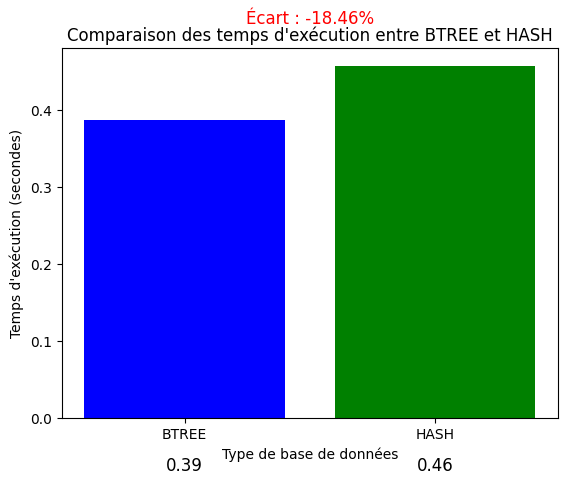

In [22]:
import matplotlib.pyplot as plt


def plot_comparaison_temps(temps_btree, temps_hash):
    # Créer les données pour le barplot
    data = {'BTREE': temps_btree, 'HASH': temps_hash}
    
    # Calculer le pourcentage d'écart entre les deux temps
    if temps_btree > temps_hash:
        percentage_diff = ((temps_btree - temps_hash) / temps_hash) * 100
        text = f'+{percentage_diff:.2f}%'
    else:
        percentage_diff = ((temps_hash - temps_btree) / temps_btree) * 100
        text = f'-{percentage_diff:.2f}%'
    
    # Créer un barplot
    fig, ax = plt.subplots()
    bars = ax.bar(data.keys(), data.values(), color=['blue', 'green'])
    
    # Ajouter les titres et labels
    ax.set_title("Comparaison des temps d'exécution entre BTREE et HASH")
    ax.set_xlabel("Type de base de données")
    ax.set_ylabel("Temps d'exécution (secondes)")
    
    # Ajouter le texte du pourcentage d'écart sur le graphique
    ax.text(0.5, max(data.values()) + 0.05, f'Écart : {text}', ha='center', va='bottom', fontsize=12, color='red')

    # Ajouter les valeurs en bas de chaque barre
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, -0.05, f'{yval:.2f}', ha='center', va='top', fontsize=12, color='black')

    # Afficher le graphique
    plt.show()

db_file_btree = 'parcoursup_btree.db'  # Nom de la base de données
db_file_hash = 'parcoursup_hash.db'  # Nom de la base de données
# Récupérer les temps d'exécution pour les deux types de bases de données
temps_btree = get_etablissements_btree(db_file_btree)
temps_hash = get_etablissements_hash(db_file_hash)

# Afficher le barplot comparatif
plot_comparaison_temps(temps_btree, temps_hash)

# Sélection de l'ensemble des données

# Commande update

On remplace les établissements publics en établissement privé et les établissements privés en public.

## BTREE

In [23]:
def process_btree(db_file):
    """Traiter la base de données BerkeleyDB en mode B-tree"""
    db_btree = berkeleydb.db.DB()
    try:
        start_time = time.time()
        db_btree.open(db_file, None, berkeleydb.db.DB_BTREE, 0)

        for key, value in db_btree.items():
            row = eval(value.decode('utf-8'))  # Convertir en dict (prudent, utiliser json si possible)

            if 'Statut de l\'établissement de la filière de formation' in row:
                statut = row['Statut de l\'établissement de la filière de formation']

                if statut == 'public':
                    row['Statut de l\'établissement de la filière de formation'] = 'privé'
                elif statut == 'privé':
                    row['Statut de l\'établissement de la filière de formation'] = 'public'

                db_btree[key] = str(row).encode('utf-8')
                print(f"Mise à jour : {key.decode('utf-8')} -> {row}")

        end_time = time.time()
        duration = end_time - start_time
        print(f"Temps d'exécution B-tree : {duration:.2f} secondes")
        return duration
    except Exception as e:
        print(f"Une erreur est survenue dans B-tree : {e}")
    finally:
        db_btree.close()


## HASH

In [24]:
import berkeleydb
import time

def process_hash(db_file):
    """Traiter la base de données BerkeleyDB en mode Hash"""
    db_hash = berkeleydb.db.DB()
    try:
        start_time = time.time()
        db_hash.open(db_file, None, berkeleydb.db.DB_HASH, 0)

        for key, value in db_hash.items():
            row = eval(value.decode('utf-8'))

            if 'Statut de l\'établissement de la filière de formation' in row:
                statut = row['Statut de l\'établissement de la filière de formation']

                if statut == 'public':
                    row['Statut de l\'établissement de la filière de formation'] = 'privé'
                elif statut == 'privé':
                    row['Statut de l\'établissement de la filière de formation'] = 'public'

                db_hash[key] = str(row).encode('utf-8')
                print(f"Mise à jour : {key.decode('utf-8')} -> {row}")

        end_time = time.time()
        duration = end_time - start_time
        print(f"Temps d'exécution Hash : {duration:.2f} secondes")
        return duration
    except Exception as e:
        print(f"Une erreur est survenue dans Hash : {e}")
    finally:
        db_hash.close()

Temps d'exécution B-tree : 0.39 secondes
Temps d'exécution Hash : 0.24 secondes


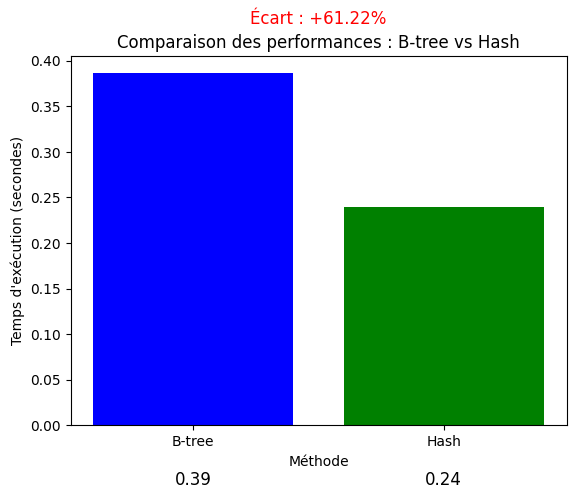

In [25]:
def plot_comparison(btree_duration, hash_duration):
    """Comparer les temps d'exécution B-tree vs Hash avec un barplot et afficher le pourcentage d'écart"""
    methods = ['B-tree', 'Hash']
    durations = [btree_duration, hash_duration]

    # Calculer le pourcentage d'écart
    if btree_duration > hash_duration:
        percentage_diff = ((btree_duration - hash_duration) / hash_duration) * 100
        text = f'+{percentage_diff:.2f}%'
    else:
        percentage_diff = ((hash_duration - btree_duration) / btree_duration) * 100
        text = f'-{percentage_diff:.2f}%'

    # Tracer le graphique
    bars = plt.bar(methods, durations, color=['blue', 'green'])
    plt.xlabel('Méthode')
    plt.ylabel('Temps d\'exécution (secondes)')
    plt.title('Comparaison des performances : B-tree vs Hash')

    # Ajouter le texte du pourcentage d'écart sur le graphique
    plt.text(0.5, max(durations) + 0.05, f'Écart : {text}', ha='center', va='bottom', fontsize=12, color='red')

    # Ajouter les valeurs en bas de chaque barre
    for bar in bars:
        yval = bar.get_height()
        # Positionner les valeurs en bas de chaque barre
        plt.text(bar.get_x() + bar.get_width() / 2, -0.05, f'{yval:.2f}', ha='center', va='top', fontsize=12, color='black')

    # Afficher le graphique
    plt.show()

# Traitement B-tree
btree_duration = process_btree(db_file_btree)

# Traitement Hash
hash_duration = process_hash(db_file_hash)

# Affichage de la comparaison
plot_comparison(btree_duration, hash_duration)

Le hash est plus rapide pour update les données.

# Performance avec ou sans index pour BekerleyDB

On utilise que l'ouverture Hash pour comparer 

In [26]:
import berkeleydb
import time

def mise_a_jour_avec_index(db_file):
    
    db_hash = berkeleydb.db.DB()
    try:
        start_time = time.time()
        db_hash.open(db_file, None, berkeleydb.db.DB_HASH, 0)

        # Création de l'index
        index = {}
        for key, value in db_hash.items():
            row = eval(value.decode('utf-8'))
            if 'Statut de l\'établissement de la filière de formation' in row:
                statut = row['Statut de l\'établissement de la filière de formation']
                if statut in ['public', 'privé']:
                    index[key] = statut

        # Mise à jour des clés à partir de l'index
        for key, statut in index.items():
            row = eval(db_hash[key].decode('utf-8'))
            if statut == 'public':
                row['Statut de l\'établissement de la filière de formation'] = 'privé'
            elif statut == 'privé':
                row['Statut de l\'établissement de la filière de formation'] = 'public'
            
            db_hash[key] = str(row).encode('utf-8')

        duration = time.time() - start_time
        print(f"Temps d'exécution AVEC index : {duration:.2f} secondes")
        return duration
    except Exception as e:
        print(f"Erreur avec index : {e}")
    finally:
        db_hash.close()

In [27]:
import berkeleydb
import time

def mise_a_jour_sans_index(db_file):
    
    db_hash = berkeleydb.db.DB()
    try:
        start_time = time.time()
        db_hash.open(db_file, None, berkeleydb.db.DB_HASH, 0)

        for key, value in db_hash.items():
            row = eval(value.decode('utf-8'))

            # Modification de la valeur si la clé existe
            if 'Statut de l\'établissement de la filière de formation' in row:
                statut = row['Statut de l\'établissement de la filière de formation']

                # Inversion des statuts
                if statut == 'public':
                    row['Statut de l\'établissement de la filière de formation'] = 'privé'
                elif statut == 'privé':
                    row['Statut de l\'établissement de la filière de formation'] = 'public'

                # Mise à jour de la base de données
                db_hash[key] = str(row).encode('utf-8')
        
        duration = time.time() - start_time
        print(f"Temps d'exécution SANS index : {duration:.2f} secondes")
        return duration
    except Exception as e:
        print(f"Erreur sans index : {e}")
    finally:
        db_hash.close()

Comparaison des performances entre SANS index et AVEC index :
Temps d'exécution SANS index : 1.38 secondes
Temps d'exécution AVEC index : 0.38 secondes

Résumé des résultats :
- Temps SANS index : 1.38 secondes
- Temps AVEC index : 0.38 secondes


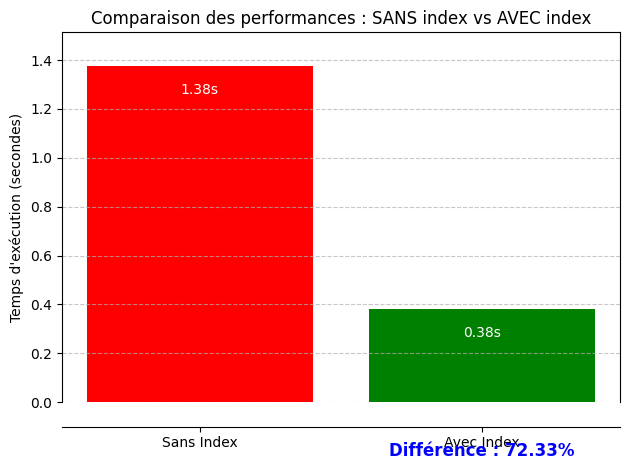

In [ ]:
import matplotlib.pyplot as plt

def plot_comparaison_performance(temps_sans_index, temps_avec_index):
   
    difference = ((temps_sans_index - temps_avec_index) / temps_sans_index) * 100

    labels = ["Sans Index", "Avec Index"]
    temps = [temps_sans_index, temps_avec_index]

    # Création du barplot
    fig, ax = plt.subplots()
    bars = ax.bar(labels, temps, color=["red", "green"])

    # Affichage des valeurs en bas des barres
    for bar, value in zip(bars, temps):
        ax.text(bar.get_x() + bar.get_width() / 2, 
                bar.get_height() - (0.05 * max(temps)), 
                f"{value:.2f}s", 
                ha='center', va='top', color='white', fontsize=10)

    # Affichage du pourcentage de différence sous la barre "Avec Index"
    ax.text(bars[1].get_x() + bars[1].get_width() / 2, 
            -0.2, 
            f"Différence : {difference:.2f}%", 
            ha='center', va='center', fontsize=12, fontweight='bold', color='blue')

    # Titres et labels
    ax.set_title("Comparaison des performances : SANS index vs AVEC index")
    ax.set_ylabel("Temps d'exécution (secondes)")

    # Ajuster les limites de l'axe Y pour que le texte du bas soit visible
    ax.set_ylim(0, max(temps) * 1.1)
    ax.spines['bottom'].set_position(('data', -0.1))

    # Affichage de la grille pour plus de lisibilité
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Affichage du graphe
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    db_file = "parcoursup_hash.db"

    print("Comparaison des performances entre SANS index et AVEC index :")
    temps_sans_index = mise_a_jour_sans_index(db_file)
    temps_avec_index = mise_a_jour_avec_index(db_file)

    print("\nRésumé des résultats :")
    print(f"- Temps SANS index : {temps_sans_index:.2f} secondes")
    print(f"- Temps AVEC index : {temps_avec_index:.2f} secondes")

    plot_comparaison_performance(temps_sans_index, temps_avec_index)




# Temps de suppression d'éléments dans la base de données

## BTREE

In [5]:
import berkeleydb

db_file = 'parcoursup_btree.db'
def del_col_btree(db_file):
    
    db_btree = berkeleydb.db.DB()

    try:
        start_time = time.time()
        # Ouvrir la base de données en mode lecture/écriture
        db_btree.open(db_file, None, berkeleydb.db.DB_BTREE, 0)

        # Parcourir toutes les clés et valeurs dans la base de données
        for key, value in db_btree.items():
            # Convertir la valeur (bytes) en dictionnaire
            row = eval(value.decode('utf-8'))

            # Vérifier si 'Filière de formation' est dans les données
            if 'Filière de formation' in row:
                # Supprimer la clé 'Filière de formation'
                del row['Filière de formation']
                # Reconvertir la ligne en chaîne et enregistrer la mise à jour dans la base de données
                db_btree[key] = str(row).encode('utf-8')
                print(f"Filière de formation supprimée pour la clé : {key.decode('utf-8')}")

        print("Suppression des 'Filière de formation' terminée avec succès.")
        end_time = time.time()
        duration = end_time - start_time
        print(f"Temps d'exécution : {duration:.2f} secondes")
        return duration
    except Exception as e:
        print(f"Une erreur est survenue : {e}")

    finally:
        db_btree.close() 


## HASH

In [6]:
import berkeleydb
import time
# Chemin vers la base de données BerkeleyDB
db_file = 'parcoursup.db'

def del_col_hash(db_file):
    # Ouvrir la base de données BerkeleyDB en mode lecture/écriture
    db_hash = berkeleydb.db.DB()

    try:
        start_time = time.time()
        # Ouvrir la base de données en mode lecture/écriture
        db_hash.open(db_file, None, berkeleydb.db.DB_HASH, 0)

        # Parcourir toutes les clés et valeurs dans la base de données
        for key, value in db_hash.items():
            # Convertir la valeur (bytes) en dictionnaire
            row = eval(value.decode('utf-8'))  # Convertir en dict (prudent, utiliser json si possible)

            # Vérifier si 'Filière de formation' est dans les données
            if 'Filière de formation' in row:
                # Supprimer la clé 'Filière de formation'
                del row['Filière de formation']
                # Reconvertir la ligne en chaîne et enregistrer la mise à jour dans la base de données
                db_hash[key] = str(row).encode('utf-8')

        print("Suppression des 'Filière de formation' terminée avec succès.")
        end_time = time.time()
        duration = end_time - start_time
        print(f"Temps d'exécution : {duration:.2f} secondes")
        return duration
    except Exception as e:
        print(f"Une erreur est survenue : {e}")

    finally:
        db_hash.close()  # Fermer proprement la base de données

Filière de formation supprimée pour la clé : ligne_12452
Filière de formation supprimée pour la clé : ligne_12453
Filière de formation supprimée pour la clé : ligne_12128
Filière de formation supprimée pour la clé : ligne_12450
Filière de formation supprimée pour la clé : ligne_12129
Filière de formation supprimée pour la clé : ligne_12451
Filière de formation supprimée pour la clé : ligne_12456
Filière de formation supprimée pour la clé : ligne_5508
Filière de formation supprimée pour la clé : ligne_12457
Filière de formation supprimée pour la clé : ligne_5509
Filière de formation supprimée pour la clé : ligne_12454
Filière de formation supprimée pour la clé : ligne_12455
Filière de formation supprimée pour la clé : ligne_12122
Filière de formation supprimée pour la clé : ligne_5504
Filière de formation supprimée pour la clé : ligne_12123
Filière de formation supprimée pour la clé : ligne_5505
Filière de formation supprimée pour la clé : ligne_12120
Filière de formation supprimée pour

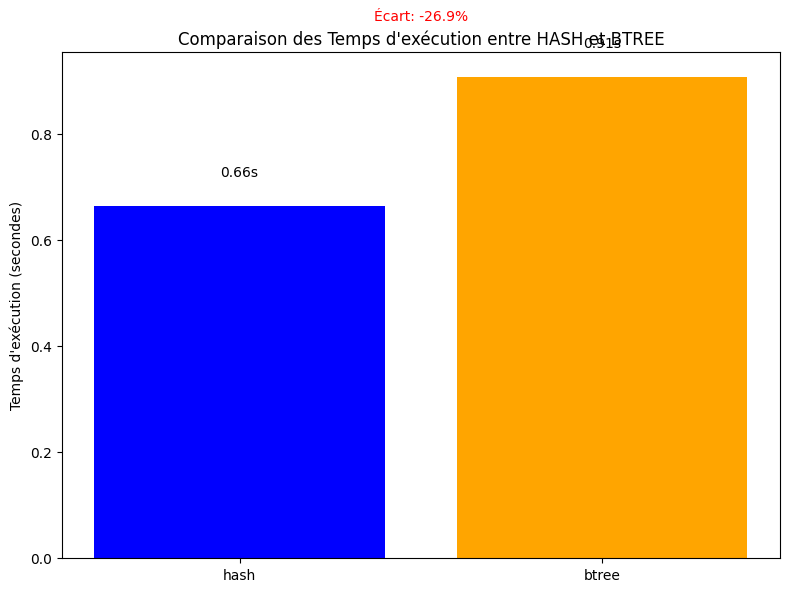

In [7]:
import matplotlib.pyplot as plt
import time

db_file_hash = 'parcoursup_hash.db'
db_file_btree = 'parcoursup_btree.db'
# Appel des fonctions pour mesurer le temps
time_hash = del_col_hash(db_file_hash)
time_btree =del_col_btree(db_file_btree)

# Labels et données
times = [time_hash, time_btree]
labels = ["hash", "btree"]

# Calcul de l'écart en pourcentage
diff_percentage = ((time_hash - time_btree) / time_btree) * 100

# Configuration du graphique
fig, ax = plt.subplots(figsize=(8, 6))
bar = ax.bar(labels, times, color=['blue', 'orange'])

# Ajouter les écarts en pourcentage au-dessus des barres
for i, value in enumerate(times):
    ax.text(i, value + 0.05, f"{value:.2f}s", ha='center', va='bottom')
if diff_percentage != 0:
    ax.text(0.5, max(times) + 0.1, f"Écart: {diff_percentage:.1f}%", ha='center', va='bottom', color='red')

# Configuration des axes et des labels
ax.set_ylabel("Temps d'exécution (secondes)")
ax.set_title("Comparaison des Temps d'exécution entre HASH et BTREE")

# Affichage du graphique
plt.tight_layout()
plt.show()


L'utilisation du Btree est plus efficace pour la suppression de colonnes 

# Suppression de tous les éléments de la base de données 

## HASH

In [31]:
import berkeleydb
import time

# Chemin vers la base de données BerkeleyDB
db_file = 'parcoursup.db'

def del_Hash(db_file):
    # Ouvrir la base de données BerkeleyDB en mode lecture/écriture
    db = berkeleydb.db.DB()

    try:
        start_time = time.time()
        # Ouvrir la base de données en mode lecture/écriture
        db.open(db_file, None, berkeleydb.db.DB_HASH, 0)

        # Parcourir toutes les clés et valeurs dans la base de données et les afficher
        for key in list(db.keys()):
            db.delete(key)  # Supprimer la clé et sa valeur associée
            

        print("Affichage de toutes les clés et valeurs terminé avec succès.")
        end_time = time.time()
        duration = end_time - start_time
        print(f"Temps d'exécution : {duration:.2f} secondes")
        return duration 
    except Exception as e:
        print(f"Une erreur est survenue : {e}")

    finally:
        db.close()  # Fermer proprement la base de données



## BTREE

In [1]:
import berkeleydb
import time

# Chemin vers la base de données BerkeleyDB
db_file = 'parcoursup_btree.db'

def process_btree(db_file):
    # Ouvrir la base de données BerkeleyDB en mode lecture/écriture
    db_tree = berkeleydb.db.DB()

    try:
        start_time = time.time()
        # Ouvrir la base de données en mode lecture/écriture
        db_tree.open(db_file, None, berkeleydb.db.DB_BTREE, 0)

        # Parcourir toutes les clés dans la base de données et les supprimer
        for key in list(db_tree.keys()):
            db_tree.delete(key)  # Supprimer la clé et sa valeur associée
            
        print("Suppression de toutes les clés terminée avec succès.")
        end_time = time.time()
        duration = end_time - start_time
        print(f"Temps d'exécution : {duration:.2f} secondes")
        return duration
    except Exception as e:
        print(f"Une erreur est survenue : {e}")

    finally:
        db_tree.close()  # Fermer proprement la base de données

Clé supprimée : ligne_0
Clé supprimée : ligne_1
Clé supprimée : ligne_10
Clé supprimée : ligne_100
Clé supprimée : ligne_1000
Clé supprimée : ligne_10000
Clé supprimée : ligne_10001
Clé supprimée : ligne_10002
Clé supprimée : ligne_10003
Clé supprimée : ligne_10004
Clé supprimée : ligne_10005
Clé supprimée : ligne_10006
Clé supprimée : ligne_10007
Clé supprimée : ligne_10008
Clé supprimée : ligne_10009
Clé supprimée : ligne_1001
Clé supprimée : ligne_10010
Clé supprimée : ligne_10011
Clé supprimée : ligne_10012
Clé supprimée : ligne_10013
Clé supprimée : ligne_10014
Clé supprimée : ligne_10015
Clé supprimée : ligne_10016
Clé supprimée : ligne_10017
Clé supprimée : ligne_10018
Clé supprimée : ligne_10019
Clé supprimée : ligne_1002
Clé supprimée : ligne_10020
Clé supprimée : ligne_10021
Clé supprimée : ligne_10022
Clé supprimée : ligne_10023
Clé supprimée : ligne_10024
Clé supprimée : ligne_10025
Clé supprimée : ligne_10026
Clé supprimée : ligne_10027
Clé supprimée : ligne_10028
Clé supp

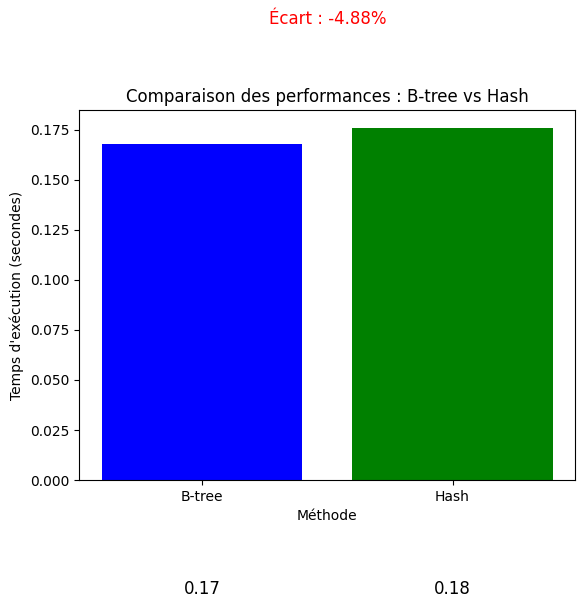

In [33]:
import matplotlib.pyplot as plt

# Fonction pour afficher un barplot avec les valeurs et l'écart en pourcentage
def plot_comparison(btree_duration, hash_duration):
    """Comparer les temps d'exécution B-tree vs Hash avec un barplot et afficher le pourcentage d'écart"""
    methods = ['B-tree', 'Hash']
    durations = [btree_duration, hash_duration]

    # Calculer le pourcentage d'écart
    if btree_duration > hash_duration:
        percentage_diff = ((btree_duration - hash_duration) / hash_duration) * 100
        text = f'+{percentage_diff:.2f}%'
    else:
        percentage_diff = ((hash_duration - btree_duration) / btree_duration) * 100
        text = f'-{percentage_diff:.2f}%'

    # Tracer le graphique
    bars = plt.bar(methods, durations, color=['blue', 'green'])
    plt.xlabel('Méthode')
    plt.ylabel('Temps d\'exécution (secondes)')
    plt.title('Comparaison des performances : B-tree vs Hash')

    # Ajouter le texte du pourcentage d'écart sur le graphique
    plt.text(0.5, max(durations) + 0.05, f'Écart : {text}', ha='center', va='bottom', fontsize=12, color='red')

    # Ajouter les valeurs en bas de chaque barre
    for bar in bars:
        yval = bar.get_height()
        # Positionner les valeurs en bas de chaque barre
        plt.text(bar.get_x() + bar.get_width() / 2, -0.05, f'{yval:.2f}', ha='center', va='top', fontsize=12, color='black')

    # Afficher le graphique
    plt.show()

# Chemin vers les bases de données
db_file_btree = 'parcoursup_btree.db'  # Nom de la base de données B-tree
db_file_hash = 'parcoursup_hash.db'    # Nom de la base de données Hash

# Récupérer les temps d'exécution pour les deux types de bases de données
btree_duration = process_btree(db_file_btree)
hash_duration = del_Hash(db_file_hash)

# Afficher le barplot comparatif
plot_comparison(btree_duration, hash_duration)
